# Wine Quality Classification with Support Vector Machines
Name: Sebastian Firsaev

Student ID: C00263348

Semester: two - 2024

Guide Notebook used:   https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb

This Jupyter notebook aims to apply Support Vector Machines (SVM) for the classification of wines into 'good' and 'bad' categories based on their physicochemical properties. 

### 1. Business Understanding
The main aim is to classify wines into 'good' and 'bad' categories based on their physicochemical properties. A project like This could help vineyards assess wine quality automatically, aiding in quality control and product segmentation. A successful model should accurately classify wines with a high precision and recall. The balance between understanding which features influence wine quality and predictive performance is crucial.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('WineQT.csv')

### 2. Data Understanding

The dataset "WineQT.csv" consists of physicochemical properties of wines and a quality rating from 0 to 10. Initial exploration aims to understand the distribution of data, identify missing values, and assess the balance between good and bad quality wines. Key steps include statistical summaries, correlation analysis, and visualization of the target variable distribution.

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [4]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

### 3. Data Preparation

check for missing values if present. Create a binary target variable 'good_quality' to classify wines as 'good' (1) if the quality rating is 7 or above, and 'bad' (0) otherwise. Explore the possibility of generating new features or transforming existing ones based on EDA insights. Data Splitting and Scaling: Split the data into training and test sets. Standardize features to ensure model accuracy, especially for SVM which is sensitive to the scale of input features.

In [5]:
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


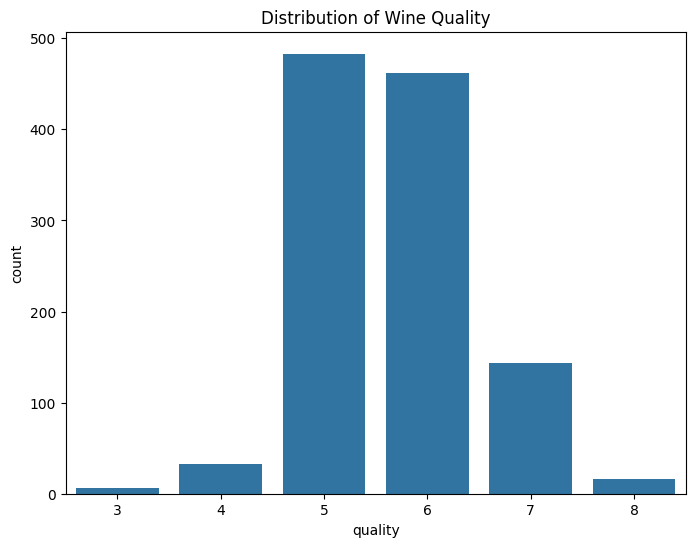

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()

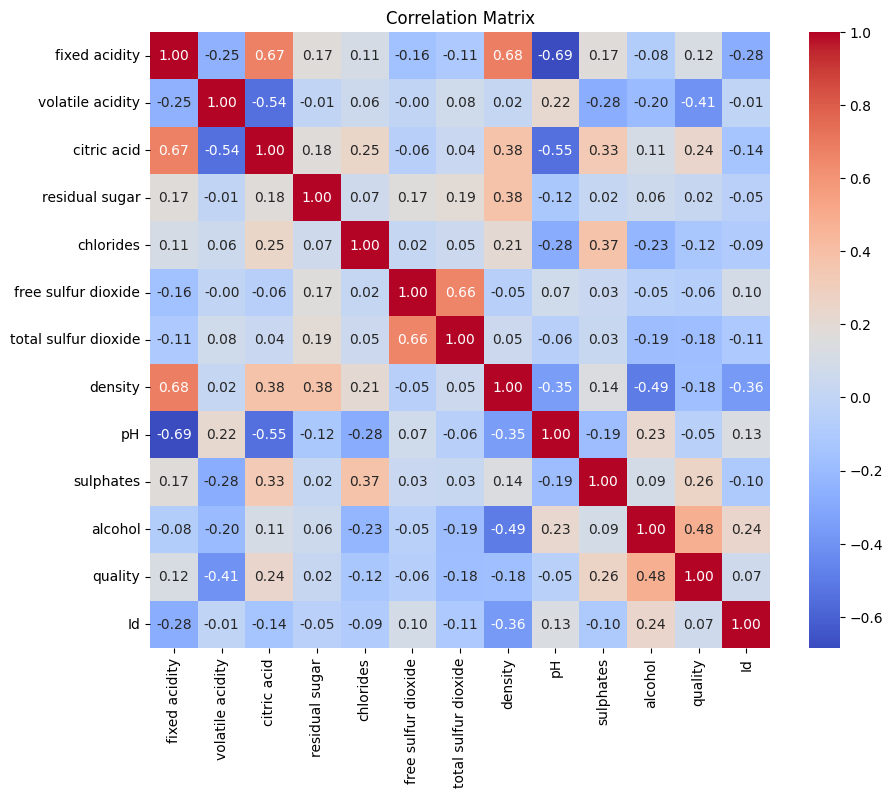

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 4. Modeling

The modelling Starts with an SVM model using a linear kernel as a baseline. SVM is Compared with other classifiers like Logistic Regression and Random Forest to evaluate SVM's performance in the context of available algorithms.GridSearchCV is used to find optimal SVM parameters, including C, gamma, and kernel type, to improve model performance.

In [8]:
data['good_quality'] = [1 if x >= 7 else 0 for x in data['quality']]
X = data.drop(['quality', 'good_quality'], axis=1)
y = data['good_quality']

In [9]:
print(data['good_quality'].value_counts())

good_quality
0    984
1    159
Name: count, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [13]:
y_pred = model.predict(X_test_scaled)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.93       201
           1       0.53      0.29      0.37        28

    accuracy                           0.88       229
   macro avg       0.72      0.63      0.65       229
weighted avg       0.86      0.88      0.87       229



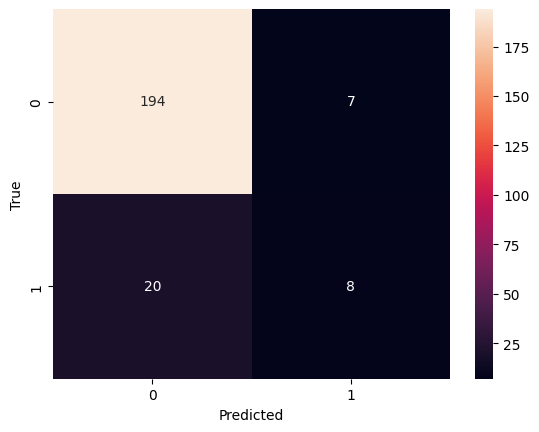

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
models = {
    'SVM': model,
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

In [17]:
def train_eval_models(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'{name} Classification Report:\n{classification_report(y_test, y_pred)}\n')

In [18]:
train_eval_models(models, X_train_scaled, y_train, X_test_scaled, y_test)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93       201
           1       0.53      0.29      0.37        28

    accuracy                           0.88       229
   macro avg       0.72      0.63      0.65       229
weighted avg       0.86      0.88      0.87       229


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       201
           1       0.60      0.54      0.57        28

    accuracy                           0.90       229
   macro avg       0.77      0.74      0.75       229
weighted avg       0.90      0.90      0.90       229


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       201
           1       0.73      0.57      0.64        28

    accuracy                           0.92       229
   macro avg       

In [20]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid.best_params_}')
print(f'Best Score: {grid.best_score_}')

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

### 5. Evaluation
The model is precise at predicting bad quality wines (0.91) much more than good quality wines (0.53). This implies that when the model predicts a wine is of good quality, it's correct only about 53% of the time.
The recall for bad quality wines is high (0.97), indicating the model is good at identifying the majority class but performs poorly on the minority class, identifying only 29% of the good quality wines correctly.
F1-Score Reflects the balance between precision and recall. For bad quality wines, it's high (0.93), but for good quality wines, it's quite low (0.37), indicating a model biased towards the majority class.
Overall accuracy is 0.88, which might appear good at first glance but, given the class imbalance, this metric alone could be misleading.

# Comparisson to Logistic Regression Classification

Shows improvement over SVM in every aspect for the minority class (good quality wines), with higher precision (0.60), recall (0.54), and F1-score (0.57).
The overall accuracy (0.90) is slightly better than SVM, indicating a better balance in predicting both classes.

# Comparisson to Random Forest Classification 

Significantly outperforms both SVM and Logistic Regression, especially in terms of precision for the minority class (0.81), indicating a high likelihood that predictions of good quality are correct. The recall (0.68) and F1-score (0.74) for the good quality class are much improved, showing the model's effectiveness in identifying good quality wines.
The overall accuracy (0.92) and weighted metrics indicate a strong performance across both classes, making it the best model among the three.


The SVM model shows a significant bias towards predicting the majority class (bad quality wines), as evidenced by its high precision and recall for class 0 but poor performance on class 1. This suggests that the linear decision boundary, even with optimized parameters, might not capture the complexity of the dataset well.
Logistic Regression offers a better balance in predicting both classes, showing improvements in identifying good quality wines, but still not optimal.
Random Forest emerges as the best model for this task, demonstrating its strength in handling imbalanced datasets and capturing the non-linear relationships between features and the target variable.

In [22]:
if grid.best_params_['kernel'] == 'linear':
    # Assuming the best model is linear
    coef = best_model.coef_[0]
    feature_importance = pd.Series(coef, index=X.columns).sort_values(key=abs, ascending=False)
    plt.figure(figsize=(10, 8))
    feature_importance.plot(kind='bar')
    plt.title('Feature Importance')
    plt.show()